In [48]:
import pandas as pd
import numpy as np
import IPython.display as display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
import scipy.stats as stats
%matplotlib inline

In [49]:
#read the data from the csv file
data=pd.read_csv('/home/ashwin/Downloads/xyz.csv')

In [50]:
#check the sample data
print(data.head())

In [51]:
#to know what are the coloumns are present
coloumns=list(data)
print(coloumns)

['Gender', 'IsUrban', 'IsEmployed', 'BoughtBefore', 'TakenLoan', 'IsStudying', 'UseTwitter', 'HasCar', 'TraveledAbroad', 'PreviouslyTargetedMktg', 'NormalizedSalary', 'NormalizedDemographyIndex', 'NormalizedInternetIndex', 'NormalizedPurchaseIndex', 'NormalizedIndex1', 'NormalizedIndex2', 'NormalizedIndex3', 'NormalizedIndex4', 'NormalizedIndex5', 'NormalizedIndex6', 'Bought?']


In [52]:
#to check what is the type of the data present in the file
data.dtypes

Gender                         int64
IsUrban                        int64
IsEmployed                     int64
BoughtBefore                   int64
TakenLoan                      int64
IsStudying                     int64
UseTwitter                     int64
HasCar                         int64
TraveledAbroad                 int64
PreviouslyTargetedMktg         int64
NormalizedSalary             float64
NormalizedDemographyIndex    float64
NormalizedInternetIndex      float64
NormalizedPurchaseIndex      float64
NormalizedIndex1             float64
NormalizedIndex2             float64
NormalizedIndex3             float64
NormalizedIndex4             float64
NormalizedIndex5             float64
NormalizedIndex6             float64
Bought?                        int64
dtype: object

In [53]:
#to check the number of non null values present in the data
#data.isnull().sum() //to check the null values present in the each coloum
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110006 entries, 0 to 110005
Data columns (total 21 columns):
Gender                       110006 non-null int64
IsUrban                      110006 non-null int64
IsEmployed                   110006 non-null int64
BoughtBefore                 110006 non-null int64
TakenLoan                    110006 non-null int64
IsStudying                   110006 non-null int64
UseTwitter                   110006 non-null int64
HasCar                       110006 non-null int64
TraveledAbroad               110006 non-null int64
PreviouslyTargetedMktg       110006 non-null int64
NormalizedSalary             110006 non-null float64
NormalizedDemographyIndex    110006 non-null float64
NormalizedInternetIndex      110006 non-null float64
NormalizedPurchaseIndex      110006 non-null float64
NormalizedIndex1             110006 non-null float64
NormalizedIndex2             110006 non-null float64
NormalizedIndex3             110006 non-null float64
Normaliz

In [54]:
#to have the very rough idea how the distributions are there
print(data.describe())

              Gender        IsUrban     IsEmployed   BoughtBefore  \
count  110006.000000  110006.000000  110006.000000  110006.000000   
mean        0.712225       0.499582       0.296784       0.497700   
std         0.452728       0.500002       0.456843       0.499997   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

           TakenLoan     IsStudying     UseTwitter         HasCar  \
count  110006.000000  110006.000000  110006.000000  110006.000000   
mean        0.436658       0.498709       0.502118       0.499955   
std         0.495974       0.500001       0.499998       0.500002   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

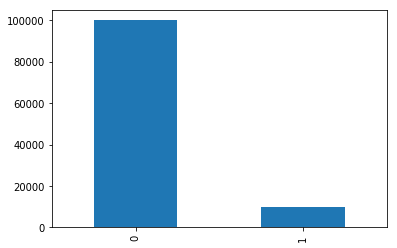

In [55]:
#since it is a classification problem we need to check 
# the data is imbalance or balanced from the below figure we can know that data
#is imbalance
data['Bought?'].value_counts().plot(kind='bar')

In [56]:
#divide the variables as the catagorical variables and continous variables
catagorical_variables=[var for var in coloumns if(data[var].dtype=='int64')]
continous_variables=[var for var in coloumns 
                     if(var not in catagorical_variables)]
del catagorical_variables[-1]

In [57]:
print(continous_variables,catagorical_variables)

['NormalizedSalary', 'NormalizedDemographyIndex', 'NormalizedInternetIndex', 'NormalizedPurchaseIndex', 'NormalizedIndex1', 'NormalizedIndex2', 'NormalizedIndex3', 'NormalizedIndex4', 'NormalizedIndex5', 'NormalizedIndex6'] ['Gender', 'IsUrban', 'IsEmployed', 'BoughtBefore', 'TakenLoan', 'IsStudying', 'UseTwitter', 'HasCar', 'TraveledAbroad', 'PreviouslyTargetedMktg']


In [58]:
# checking the skewness
# since all the continous variables are normalized skewness in in the acceptable range
#so no need of data transformation
for variable in continous_variables:
    print(variable,stats.skew(data[variable]))

NormalizedSalary -0.004322403421817578
NormalizedDemographyIndex -0.47746633983252657
NormalizedInternetIndex -0.005246306227184256
NormalizedPurchaseIndex -0.10158605205558231
NormalizedIndex1 0.014198139362314692
NormalizedIndex2 0.015817446970983026
NormalizedIndex3 -0.39798439408109615
NormalizedIndex4 0.6804185702079261
NormalizedIndex5 -0.005322948859995818
NormalizedIndex6 0.06192091629948348


In [63]:
dummified_data=data[catagorical_variables].astype(np.object)
#dummified_data=data[catagorical_variables]
dummified_data=pd.get_dummies(dummified_data)

In [64]:
dummified_data.shape

(110006, 20)

In [65]:
data_modified=pd.concat((dummified_data,data[continous_variables]),axis=1)

In [66]:
list(data_modified)

['Gender_0',
 'Gender_1',
 'IsUrban_0',
 'IsUrban_1',
 'IsEmployed_0',
 'IsEmployed_1',
 'BoughtBefore_0',
 'BoughtBefore_1',
 'TakenLoan_0',
 'TakenLoan_1',
 'IsStudying_0',
 'IsStudying_1',
 'UseTwitter_0',
 'UseTwitter_1',
 'HasCar_0',
 'HasCar_1',
 'TraveledAbroad_0',
 'TraveledAbroad_1',
 'PreviouslyTargetedMktg_0',
 'PreviouslyTargetedMktg_1',
 'NormalizedSalary',
 'NormalizedDemographyIndex',
 'NormalizedInternetIndex',
 'NormalizedPurchaseIndex',
 'NormalizedIndex1',
 'NormalizedIndex2',
 'NormalizedIndex3',
 'NormalizedIndex4',
 'NormalizedIndex5',
 'NormalizedIndex6']

In [74]:
print(data_modified.shape)
target=data['Bought?']

In [75]:
X_train, X_test, y_train, y_test = train_test_split( data_modified,target,
        random_state=100,test_size=0.30,stratify=target)

In [76]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(77004, 30)
(77004,)
(33002, 30)
(33002,)
